<a href="https://colab.research.google.com/github/ako-precious/Cricket_Stats/blob/main/Image_Processing_and_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Image Processing and Object Detection
This notebook includes implementations for various image processing algorithms using OpenCV, and an object detection task using the YOLO model on the COCO dataset.

## Q1: Implement the Harris Algorithm using OpenCV

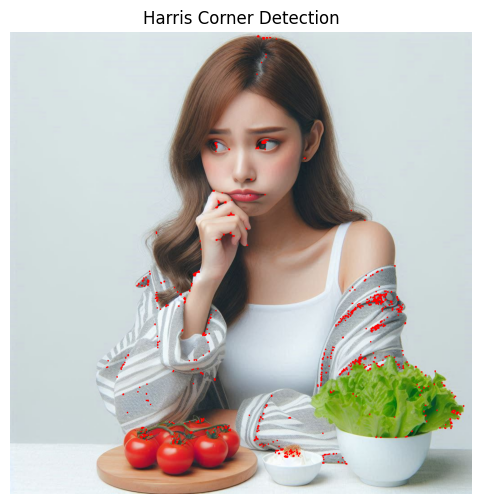

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image = cv2.imread('sample.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detection
gray = np.float32(gray)
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner points for better visibility
harris_corners = cv2.dilate(harris_corners, None)

# Highlight corners in the original image
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Display the results
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

## Q2: Implement Image Pyramid using OpenCV

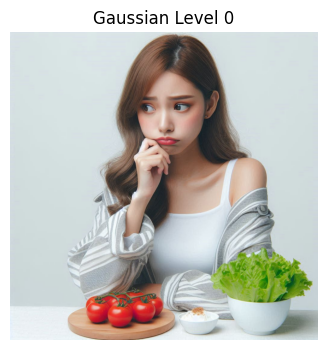

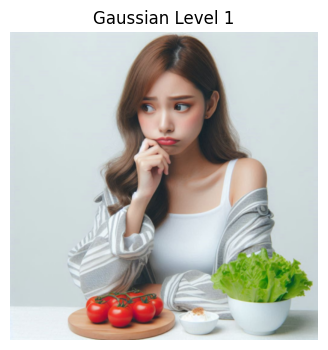

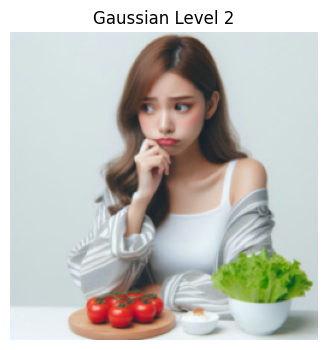

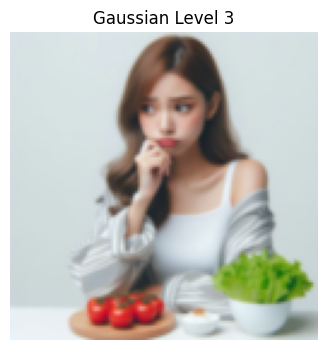

In [13]:
# Load an image
image = cv2.imread('sample.jpeg')  # Replace with your image file

# Generate Gaussian Pyramid
layer = image.copy()
gaussian_pyramid = [layer]
for i in range(3):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)

# Display Gaussian Pyramid
for i, layer in enumerate(gaussian_pyramid):
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB))
    plt.title(f'Gaussian Level {i}')
    plt.axis('off')
    plt.show()

## Q3: Implement SURF or Watershed Algorithm using OpenCV

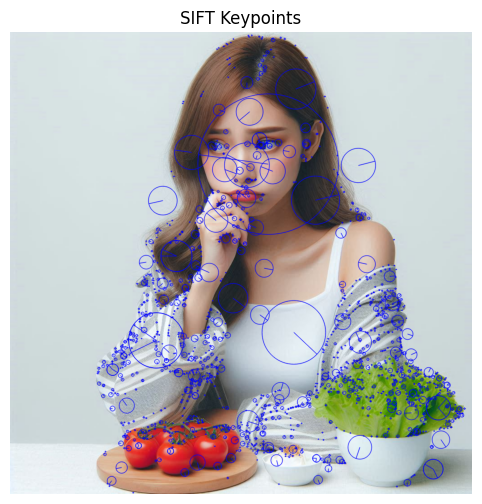

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image = cv2.imread('sample.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT - Since SURF is patented, switching to SIFT which is a free alternative
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (255, 0, 0), 4)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints') # Changed the title to reflect the algorithm change
plt.axis('off')
plt.show()

## Q4: Implement the SIFT Algorithm using OpenCV

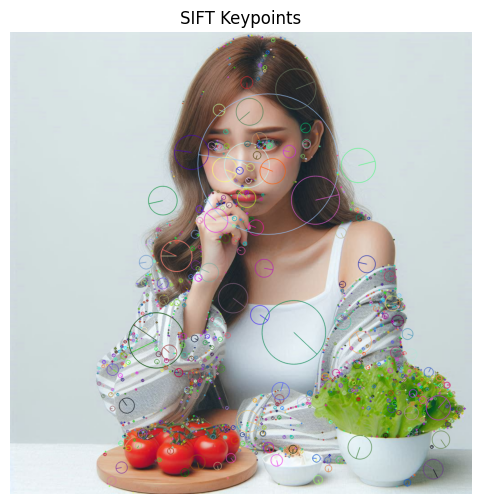

In [15]:
# Load an image
image = cv2.imread('sample.jpeg')  # Replace with your image file
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/ultralytics/coco128
License(s): GNU Affero General Public License 3.0
coco128.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  coco128.zip
replace coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: coco128/LICENSE         
  inflating: coco128/README.txt      
  inflating: coco128/images/train2017/000000000009.jpg  
  inflating: coco128/images/train2017/000000000025.jpg  
  inflating: coco128/images/train2017/000000000030.jpg  
  inflating: coco128/images/train2017/000000000034.jpg  
  inflating: coco128/images/train2017/000000000036.jpg  
  inflating: coco128/images/train2017/000000000042.jpg  
  inflating: coco128/images/train2017/000000000049.jpg  
  inflating: coco128/images/train2017/000000000061.jpg  
  inflating: coco128/images/train2017/000000000064.jpg  
  inflating: coco128/images/train2017/000000000071.j

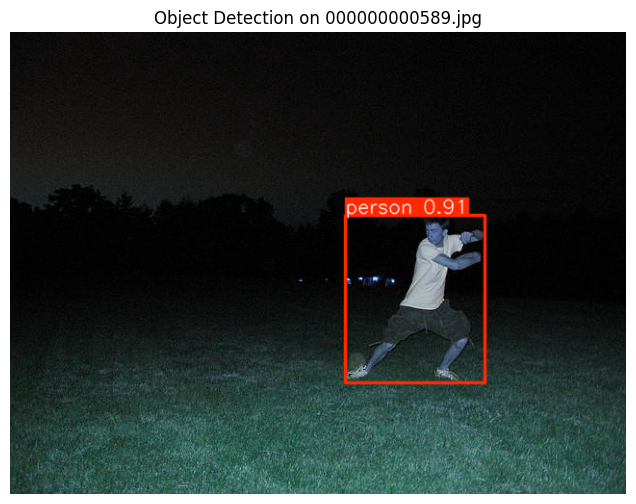


image 1/1 /content/coco128/images/train2017/000000000397.jpg: 480x640 1 pizza, 1 chair, 360.3ms
Speed: 4.5ms preprocess, 360.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


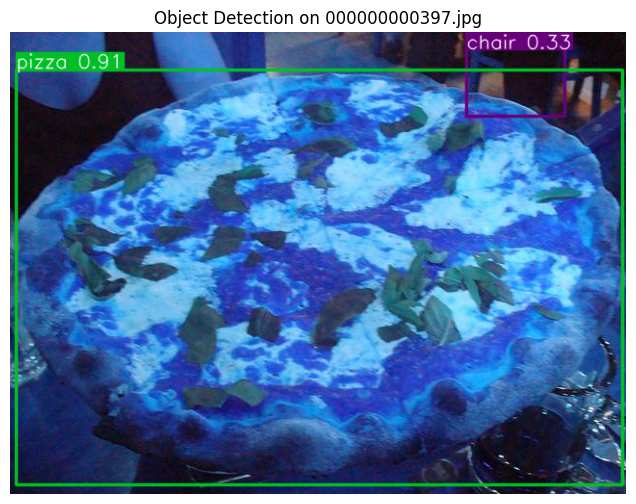


image 1/1 /content/coco128/images/train2017/000000000636.jpg: 640x480 1 toilet, 293.2ms
Speed: 2.3ms preprocess, 293.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


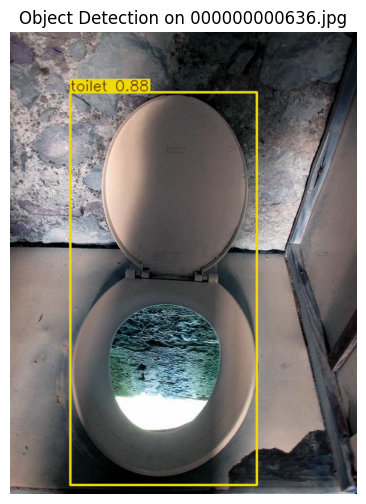


image 1/1 /content/coco128/images/train2017/000000000144.jpg: 480x640 4 giraffes, 211.6ms
Speed: 2.7ms preprocess, 211.6ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)


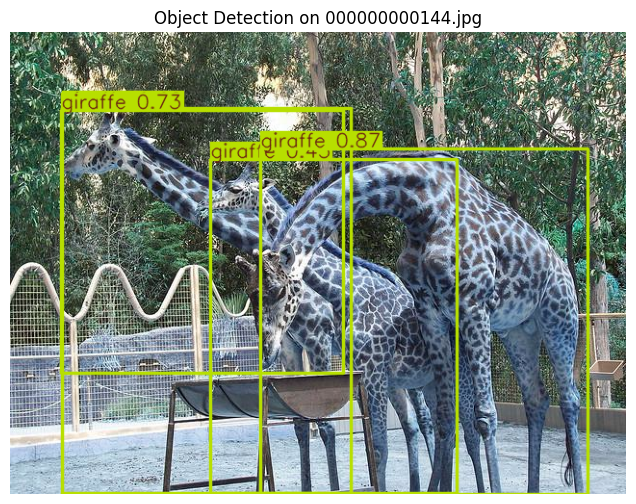


image 1/1 /content/coco128/images/train2017/000000000201.jpg: 448x640 2 persons, 7 snowboards, 278.4ms
Speed: 2.3ms preprocess, 278.4ms inference, 3.2ms postprocess per image at shape (1, 3, 448, 640)


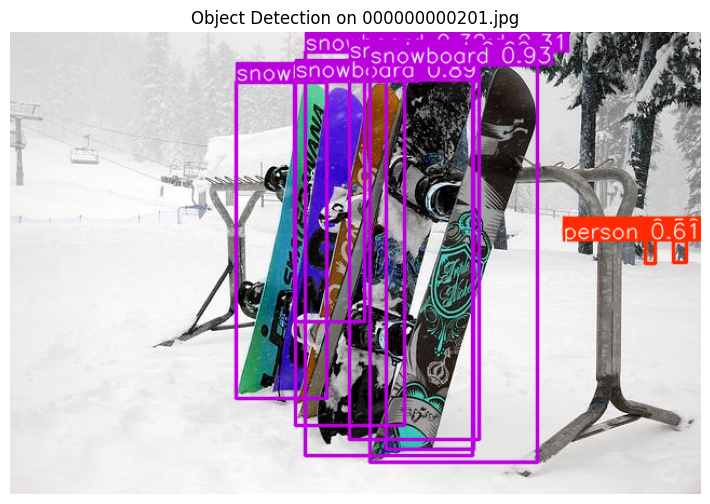

In [27]:
# prompt: Implement object detection using YOLO on the COCO dataset and get the dataset from Kaggle. Provide the
# results for any 5 images (for testing purposes) from the dataset.

!pip install kaggle
!pip install opencv-python
!pip install matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Download COCO dataset from Kaggle (replace with your Kaggle credentials)
!mkdir ~/.kaggle
!echo '{"username":"akoprecious","key":"185ab14a1107e08452afe8eff4013a95"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ultralytics/coco128
!unzip coco128.zip

# Load YOLOv5 model
!pip install ultralytics
from ultralytics import YOLO
model = YOLO('yolov8n.pt') # Using yolov8n for faster inference

# Define the directory containing images
image_dir = 'coco128/images/train2017'
images = os.listdir(image_dir)[:5] # Get the first 5 images in the folder

for image_name in images:
  image_path = os.path.join(image_dir, image_name)
  results = model(image_path)  # Perform object detection
  result = results[0]

  # Annotate and display the image
  annotated_frame = result.plot()
  plt.figure(figsize=(10, 6))
  plt.imshow(annotated_frame)
  plt.title(f'Object Detection on {image_name}')
  plt.axis('off')
  plt.show()

In [ ]:
jupyter nbconvert --to pdf your_notebook.ipynb
